### Analyzing the trends of COVID-19 with python 
# problem statement:
##### Given data about COVID-19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make  predication about the number of cases excepted a week in future based on current trends
Study and analyze various trends of COVID-19

In [9]:
# FB prophet library---> we don't have to worry about stationarity or seasonality

In [10]:
# In predicton the actual data is already present 
# In forecasting, we perform the prediction for the data that is not present 

In [11]:
# Plotly---> It plots a globe like graph (choropleth)

In [12]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px

import warnings      #I want my system ignore if any warning will appear. Not to load that warning
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [14]:
df            #Duck typing---> capitle and small later combined

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [15]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [16]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [17]:
#renaming the colimns
df.rename(columns={'Date':'date',
                  'Province/State':'state',
                  'Country/Region':'country',
                  'Lat':'lat',
                  'Long':'long',
                  'Confirmed':'confirmed',
                  'Deaths':'death',
                  'Recovered':'recovered'}, inplace=True)
# df = df.rename(columns={'Date':'date',
#                   'Province/State':'state',
#                   'Country/Region':'country',
#                   'Lat':'lat',
#                   'Long':'long',
#                   'Confirmed':'confirmed',
#                   'Deaths':'death',
#                   'Recovered':'recovered'})

In [18]:
df.head()

,state,country,lat,long,date,confirmed,death,recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [19]:
df['active']=df['confirmed']-df['death']-df['recovered']

In [20]:
df

,state,country,lat,long,date,confirmed,death,recovered,Active,WHO Region,active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [75]:
# countries having most active cases
top = df[df['date']==df['date'].max()]
world = top.groupby('country')['confirmed','active','death'].sum().reset_index()
#max---> for last date, sum---> countries comming multiple no. of time due to state column so to colab them we use sum
#('country')--->group column countrywise, ['']--->only these column

In [76]:
world.head()

,country,confirmed,active,death
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41


In [77]:
top['country'].value_counts()

China                               33
Canada                              12
France                              11
United Kingdom                      11
Australia                            8
Netherlands                          4
Denmark                              2
Afghanistan                          1
Saudi Arabia                         1
Romania                              1
Russia                               1
Rwanda                               1
Saint Lucia                          1
Saint Vincent and the Grenadines     1
San Marino                           1
Serbia                               1
Senegal                              1
Portugal                             1
Seychelles                           1
Singapore                            1
Slovakia                             1
Slovenia                             1
Somalia                              1
South Africa                         1
Spain                                1
Qatar                    

In [78]:
df['active'].sort_values()

34669        -14
34147        -13
34408        -13
33886        -10
16760         -6
18065         -6
17804         -6
16499         -6
16238         -6
17021         -6
17282         -6
17543         -6
18326         -6
32320         -4
32581         -3
32059         -2
47192         -2
40080         -1
11853          0
11838          0
11861          0
11869          0
11842          0
11843          0
11844          0
11846          0
11847          0
11860          0
11848          0
11868          0
11864          0
11867          0
11851          0
11852          0
11857          0
11855          0
11854          0
11866          0
11832          0
11833          0
11750          0
11753          0
11755          0
11763          0
11765          0
11766          0
11769          0
11771          0
11774          0
11775          0
11776          0
11777          0
11778          0
11782          0
11783          0
11784          0
11785          0
11787          0
11789         

In [25]:
world['active'].max()

2816444

In [79]:
figure = px.choropleth(world,locations='country',          #px--->plotly.express, choropleth-->use to visualise data in globe 
                      locationmode='country names',color='active',      #like structure
                      hover_name='country',range_color=[1,100000],
                      color_continuous_scale='reds',
                      title='countries with active cases')
figure.show()

[Text(0.5, 0, 'date'), Text(0, 0.5, 'total_cases')]

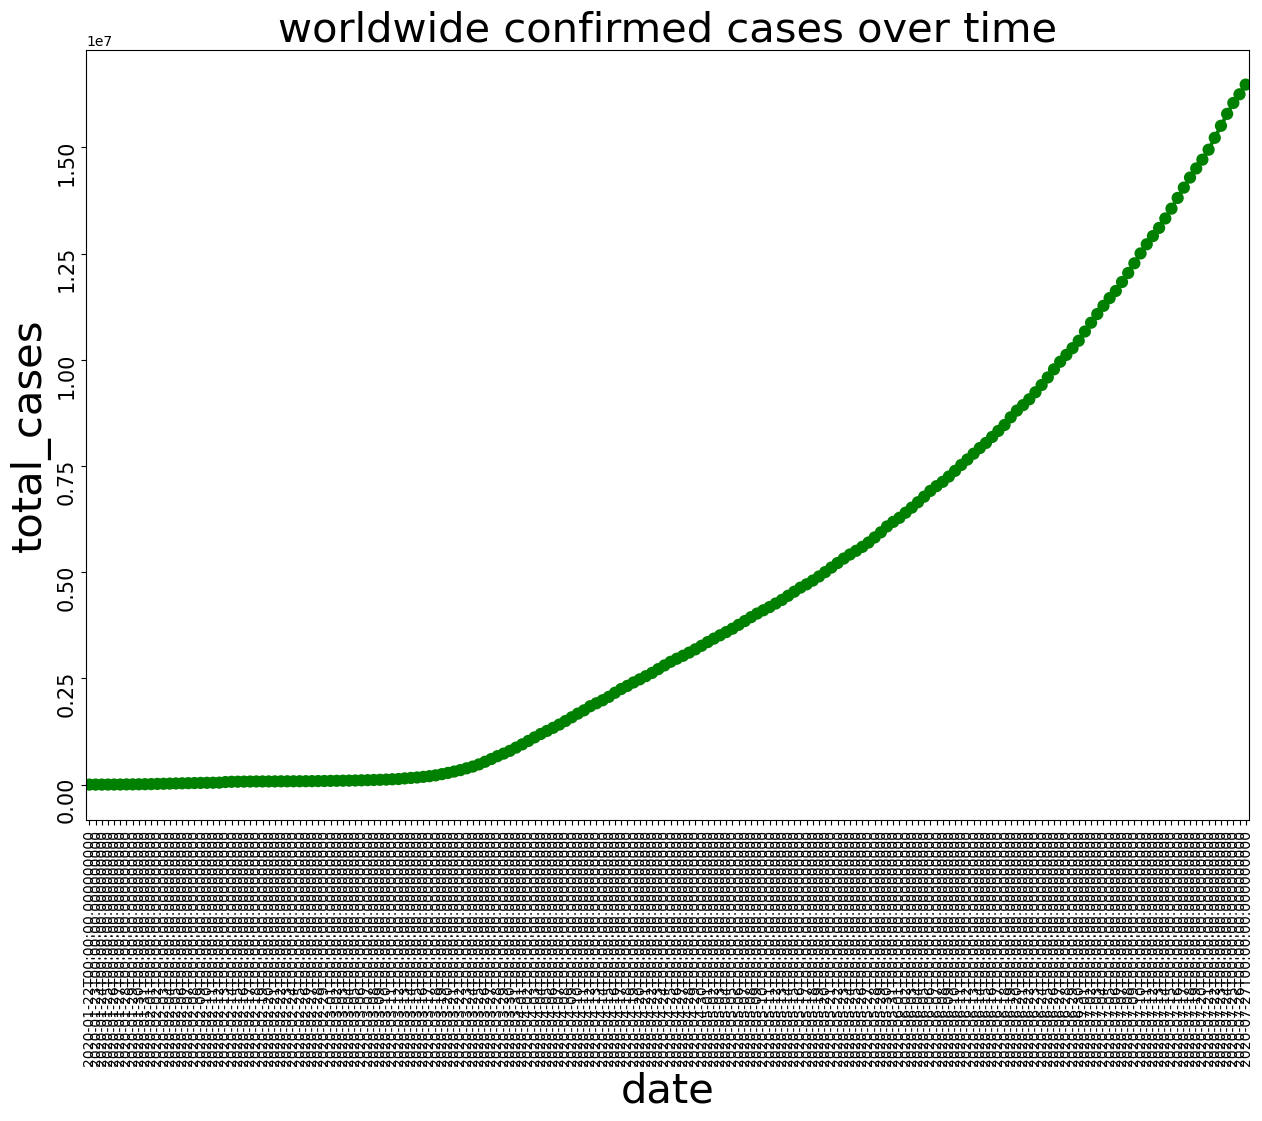

In [80]:
# Trends of how COVID spread
plt.figure (figsize=(15,10))
plt.xticks(rotation=90, fontsize = 10)      #all names on x_axis is rotated 90
plt.yticks(fontsize=15)
plt.xlabel('date', fontsize=30)
plt.ylabel('total cases',fontsize=30)
plt.yticks(rotation=90)
plt.title('worldwide confirmed cases over time',fontsize = 30)
total_cases = df.groupby('date')['date','confirmed'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])
ax=sns.pointplot(x=total_cases.date, y=total_cases.confirmed,color='green')
ax.set(xlabel='date',ylabel='total_cases')

In [81]:
top_actives = top.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives
#sort=to knows which country have higest number of active cases

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

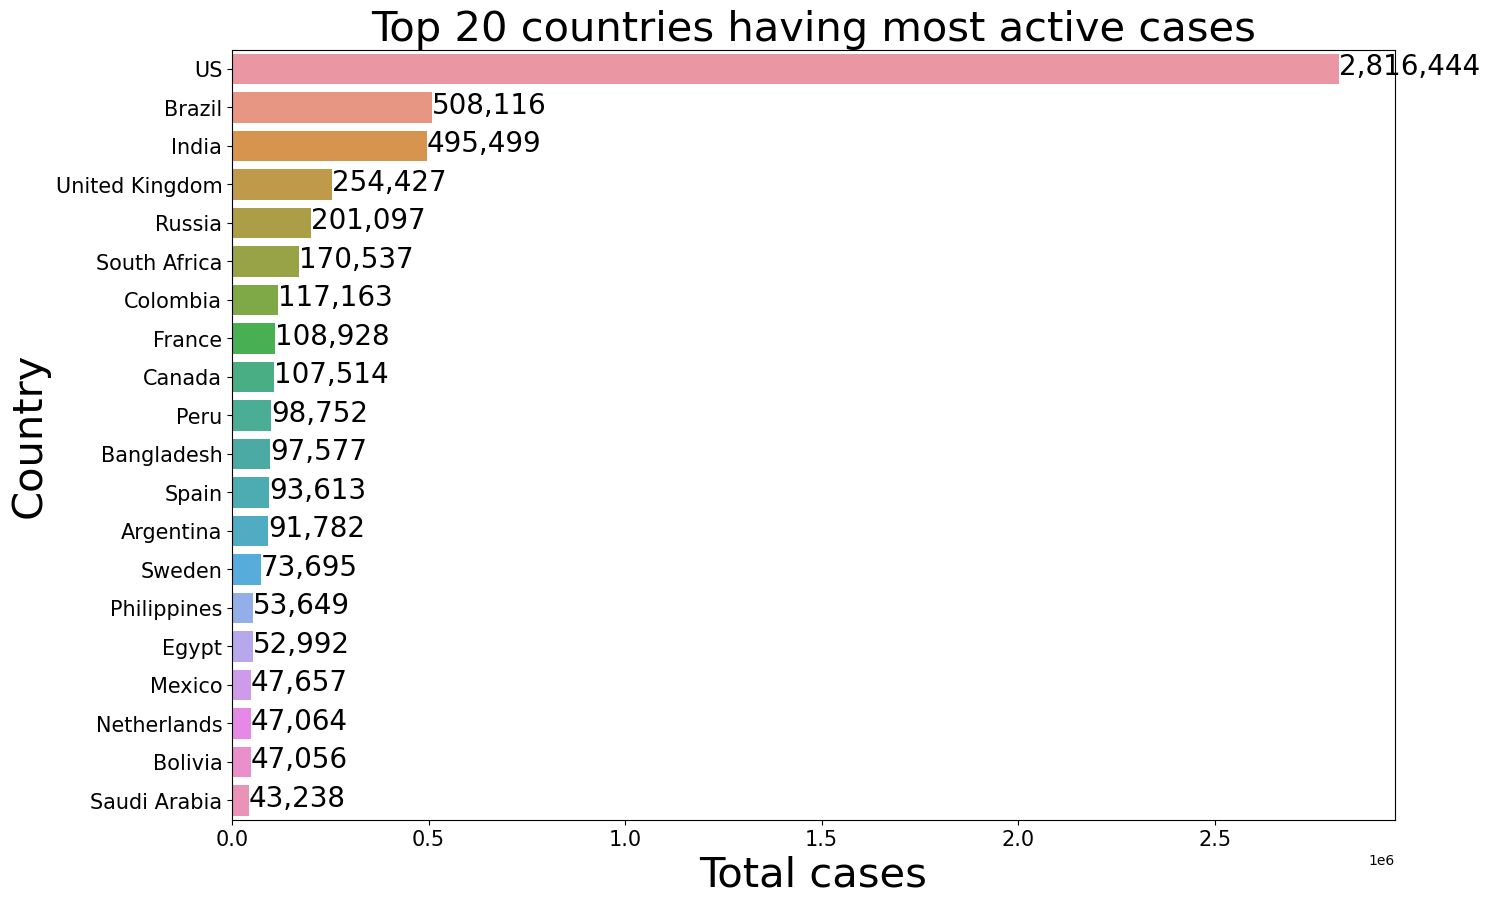

In [29]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active, y=top_actives.country)
for i, (value,name) in enumerate(zip(top_actives.active,top_actives.country)):
    ax.text(value, i-.05,f'{value:,.0f}',size=20,ha="left",va="center")
ax.set(xlabel="Total cases",ylabel="Country")

In [30]:
# Top Death Rates
top_deaths = top.groupby(by="country")["death"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

,country,death
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


[Text(0.5, 0, 'total cases'), Text(0, 0.5, 'country')]

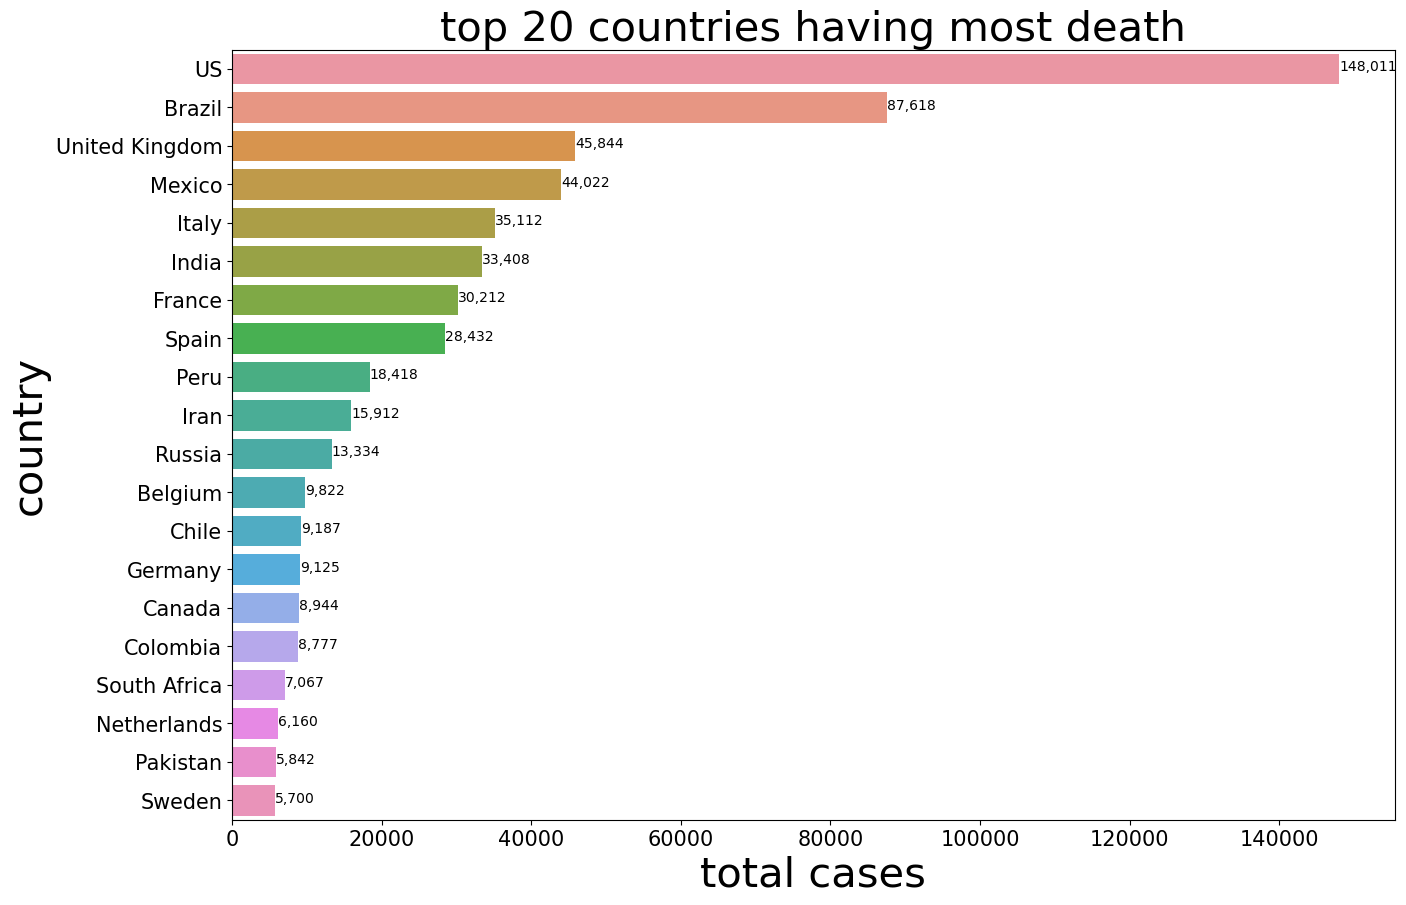

In [31]:
top[(top['date']=='2020-07-27') & (top['country']=='Afghanistan')]
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('total cases', fontsize=30)
plt.ylabel('country', fontsize=30)
plt.title('top 20 countries having most death', fontsize=30)
ax=sns.barplot(x=top_deaths.death,y=top_deaths.country)
for i , (value,name) in enumerate(zip(top_deaths.death,top_deaths.country)):
    ax.text(value,i-.05,f'{value:,.0f}',size=10, ha='left', va='center')
ax.set(xlabel='total cases',ylabel='country')

In [32]:
top_deaths

,country,death
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


In [33]:
#top recoverd rate
top_recovered = top.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()
top_recovered

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

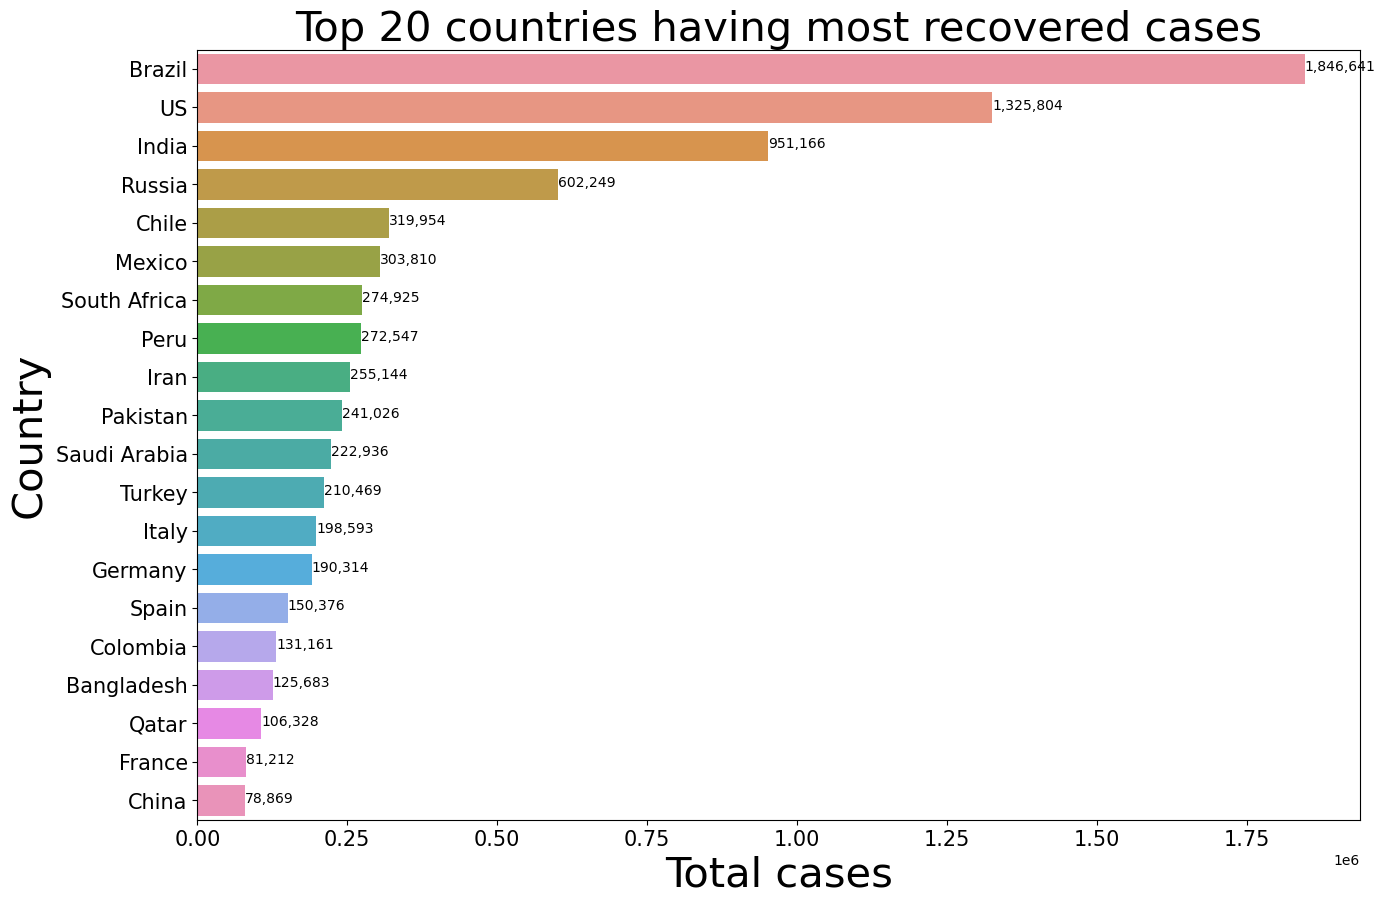

In [34]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most recovered cases",fontsize=30)
ax = sns.barplot(x=top_recovered.recovered, y=top_recovered.country)
for i, (value,name) in enumerate(zip(top_recovered.recovered,top_recovered.country)):
  ax.text(value, i-.05,f'{value:,.0f}',size=10,ha="left",va="center")
ax.set(xlabel="Total cases",ylabel="Country")

In [35]:
df.head()

,state,country,lat,long,date,confirmed,death,recovered,Active,WHO Region,active
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,0


In [36]:
Brazil=df[df.country=='Brazil']
Brazil=Brazil.groupby(by='date')['recovered','death','confirmed','active'].sum().reset_index()
Brazil

,date,recovered,death,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [37]:
Brazil.sort_values(by='date',ascending=False)

,date,recovered,death,confirmed,active
187,2020-07-27,1846641,87618,2442375,508116
186,2020-07-26,1812913,87004,2419091,519174
185,2020-07-25,1785359,86449,2394513,522705
184,2020-07-24,1693214,85238,2343366,564914
183,2020-07-23,1620313,84082,2287475,583080
...,...,...,...,...,...
4,2020-01-26,0,0,0,0
3,2020-01-25,0,0,0,0
2,2020-01-24,0,0,0,0
1,2020-01-23,0,0,0,0


In [38]:
Brazil

,date,recovered,death,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [39]:
pd.set_option('display.max_rows',None)

In [40]:
US=df[df.country=='US']
US=US.groupby(by='date')['recovered','death','confirmed','active'].sum().reset_index()
US

,date,recovered,death,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
5,2020-01-27,0,0,5,5
6,2020-01-28,0,0,5,5
7,2020-01-29,0,0,5,5
8,2020-01-30,0,0,5,5
9,2020-01-31,0,0,7,7


In [41]:
India=df[df.country=='India']
India=India.groupby(by='date')['recovered','death','confirmed','active'].sum().reset_index()
India

,date,recovered,death,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
5,2020-01-27,0,0,0,0
6,2020-01-28,0,0,0,0
7,2020-01-29,0,0,0,0
8,2020-01-30,0,0,1,1
9,2020-01-31,0,0,1,1


In [42]:
Russia=df[df.country=='Russia']
Russia=Russia.groupby(by='date')['recovered','death','confirmed','active'].sum().reset_index()
Russia

,date,recovered,death,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
5,2020-01-27,0,0,0,0
6,2020-01-28,0,0,0,0
7,2020-01-29,0,0,0,0
8,2020-01-30,0,0,0,0
9,2020-01-31,0,0,2,2


In [43]:
United_Kingdom=df[df.country=='United Kingdom']
United_Kingdom=United_Kingdom.groupby(by='date')['recovered','death','confirmed','active'].sum().reset_index()
United_Kingdom

,date,recovered,death,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
5,2020-01-27,0,0,0,0
6,2020-01-28,0,0,0,0
7,2020-01-29,0,0,0,0
8,2020-01-30,0,0,0,0
9,2020-01-31,0,0,2,2


In [44]:
# plt.figure(figsize=(15,10))
# sns.pointplot(brazil.index,brazil.confirmed,color='blue')
# sns.pointplot(us.index,us.confirmed,color='pink')
# sns.pointplot(india.index,india.confirmed,color='green')
# sns.pointplot(uk.index,uk.confirmed,color='red')
# plt.xlabel('NO.of days', fontsize=20)
# plt.ylabel('confirmed cases',fontsize=20)
# plt.title('confirmed cases overtime', fontsize=30)


In [45]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [46]:
from prophet import Prophet

In [47]:
import os
os                #(operating system)

<module 'os' from 'C:\\Users\\LENOVO\\anaconda3\\lib\\os.py'>

In [48]:
data = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])      #(it will take in proper date formate)

In [49]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [50]:
total_active = data['Active'].sum()
print('Total no. pf active covid 2019 cases', total_active)

Total no. pf active covid 2019 cases 396715350


In [51]:
data['Active']=data['Confirmed']-data['Deaths']-data['Recovered']

In [52]:
total_active=data['Active'].sum()

In [53]:
print('Total no. pf detected COVID 2019 cases', total_active)

Total no. pf detected COVID 2019 cases 396715350


In [54]:
Confirmed = data.groupby('Date').sum(['confirmed']).reset_index()
Deaths = data.groupby('Date').sum(['deaths']).reset_index()
Recovered = data.groupby('Date').sum(['recovered']).reset_index()
Confirmed.head()

,Date,Lat,Long,Confirmed,Deaths,Recovered,Active
0,2020-01-22,5594.20365,6140.869714,555,17,28,510
1,2020-01-23,5594.20365,6140.869714,654,18,30,606
2,2020-01-24,5594.20365,6140.869714,941,26,36,879
3,2020-01-25,5594.20365,6140.869714,1434,42,39,1353
4,2020-01-26,5594.20365,6140.869714,2118,56,52,2010


In [55]:
# In TIme Series, or FB forecasting we cannot pass all the column like other ML models, specilly in FB forecast only 
# two column can be passed,one is date and another is to be any one column (DS (data about date)and y(target column))

In [56]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
death = data.groupby('Date').sum()['Deaths'].reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [57]:
# For building a forecasting modal using FB prophet library, there should be only 2 columns passed 
# the column names should always be ----> 'DS','Y'

In [58]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])


In [59]:
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927


In [60]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail(7)

21:07:18 - cmdstanpy - INFO - Chain [1] start processing
21:07:19 - cmdstanpy - INFO - Chain [1] done processing


,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


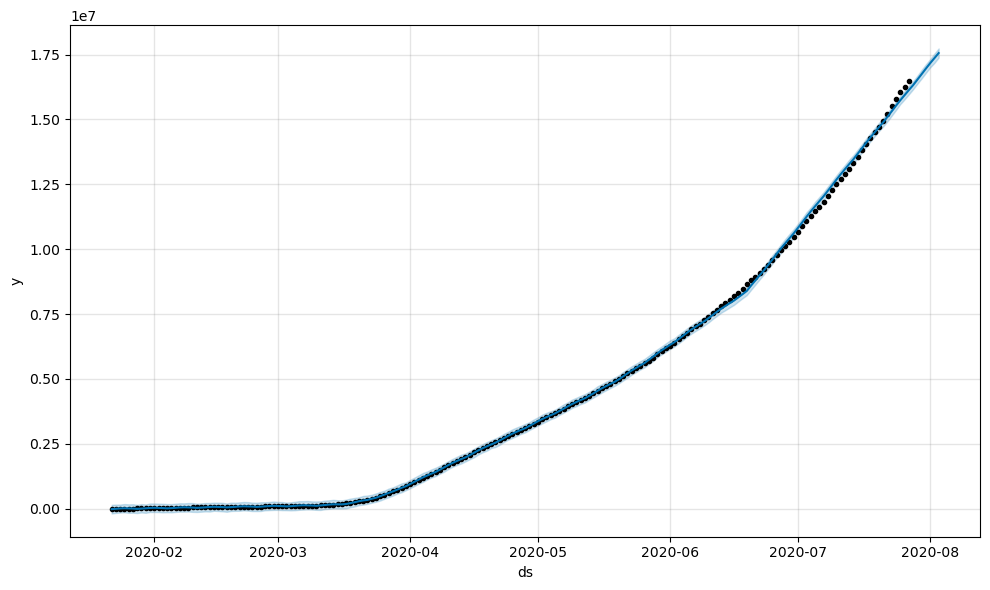

In [61]:
forecast = m.predict(future)
forecast.tail(7)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
Confirmed_forecast_plot=m.plot(forecast)

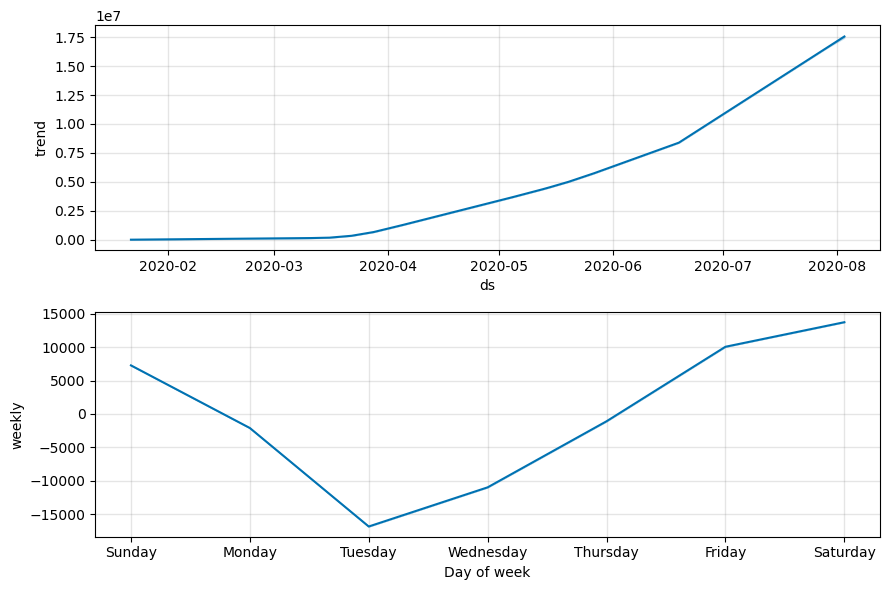

In [62]:
Confirmed_forecast_plot1=m.plot_components(forecast)

In [63]:
data.head(1)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean


In [64]:
Recovered = data.groupby('Date').sum(['recovered']).reset_index()
Recovered.head()

,Date,Lat,Long,Confirmed,Deaths,Recovered,Active
0,2020-01-22,5594.20365,6140.869714,555,17,28,510
1,2020-01-23,5594.20365,6140.869714,654,18,30,606
2,2020-01-24,5594.20365,6140.869714,941,26,36,879
3,2020-01-25,5594.20365,6140.869714,1434,42,39,1353
4,2020-01-26,5594.20365,6140.869714,2118,56,52,2010


In [65]:
recovered = data.groupby('Date').sum()['Recovered'].reset_index()
death = data.groupby('Date').sum()['Deaths'].reset_index()
recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [66]:
recovered.columns=['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])

In [67]:
recovered

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
5,2020-01-27,61
6,2020-01-28,107
7,2020-01-29,125
8,2020-01-30,141
9,2020-01-31,219


In [68]:
m=Prophet(interval_width=0.95)
m.fit(recovered)
future=m.make_future_dataframe(periods=7)
future.tail(7)

21:07:21 - cmdstanpy - INFO - Chain [1] start processing
21:07:21 - cmdstanpy - INFO - Chain [1] done processing


,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


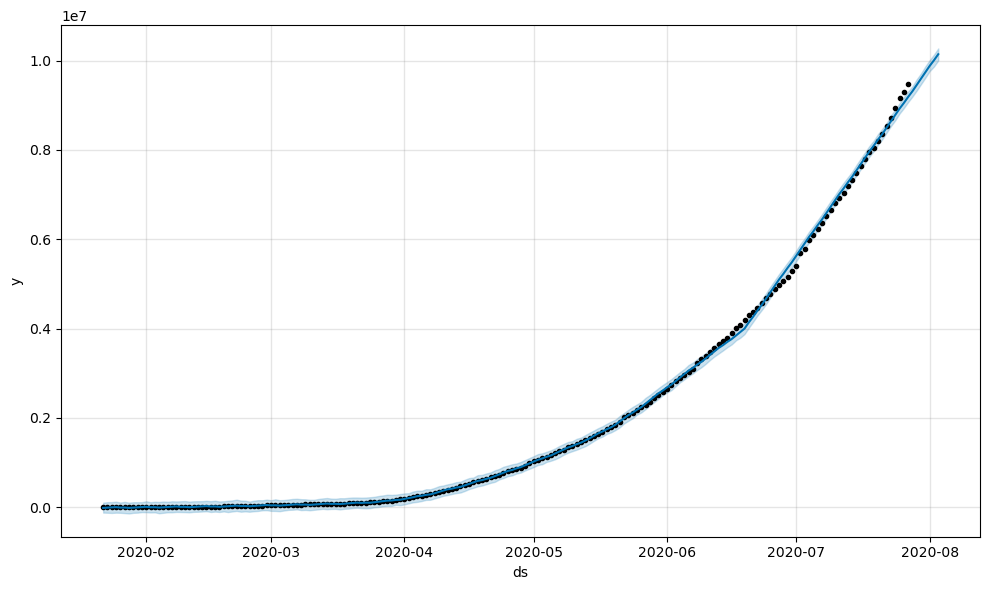

In [69]:
forecast = m.predict(future)
forecast.tail(7)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
Recovered_forecast_plot=m.plot(forecast)

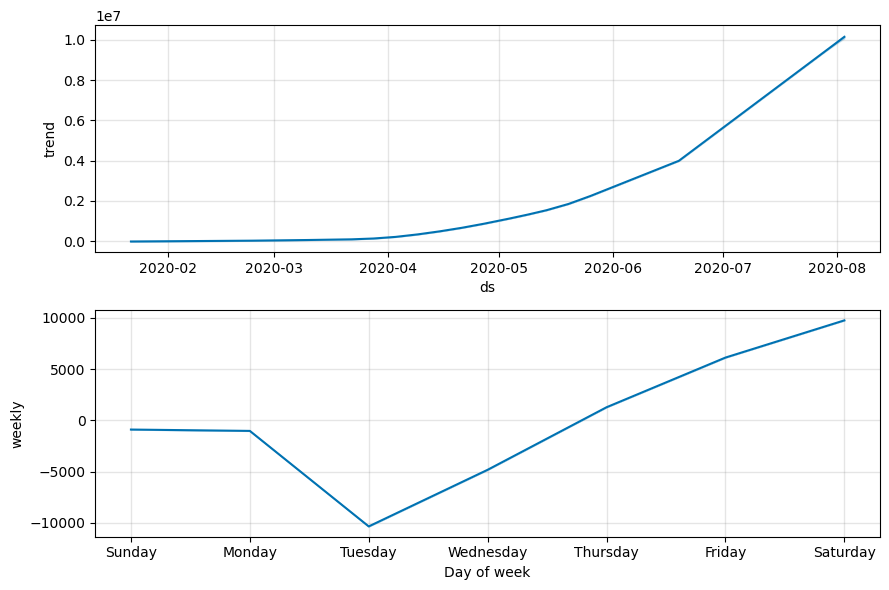

In [70]:
Recovered_forecast_plot1=m.plot_components(forecast)